In [6]:
# Importing relevant packages
import numpy as np
import os, sys
import pickle
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from scipy import stats as stats

## path to the downloaded gutenberg corpus
path_gutenberg = os.path.join(os.pardir,os.pardir,'gutenberg')

## import internal helper functions
src_dir = os.path.join(os.pardir,'src')
sys.path.append(src_dir)

# Accessing the metadata
sys.path.append(os.path.join(path_gutenberg,'src'))
from metaquery import meta_query
mq = meta_query(path=os.path.join(path_gutenberg,'metadata','metadata.csv'), filter_exist=False)

In [7]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'axes.titlesize':12,
          'axes.labelsize': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'xtick.direction':'out',
          'ytick.direction':'out',
          'axes.spines.right' : True,
          'axes.spines.top' : True
         }
plt.rcParams.update(params)

from matplotlib import rc
rc('text', usetex=True)

/var/folders/km/9ttg7bls33d_8n560hhmbnr00000gn/T/ipykernel_15803/3338380861.py:126: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


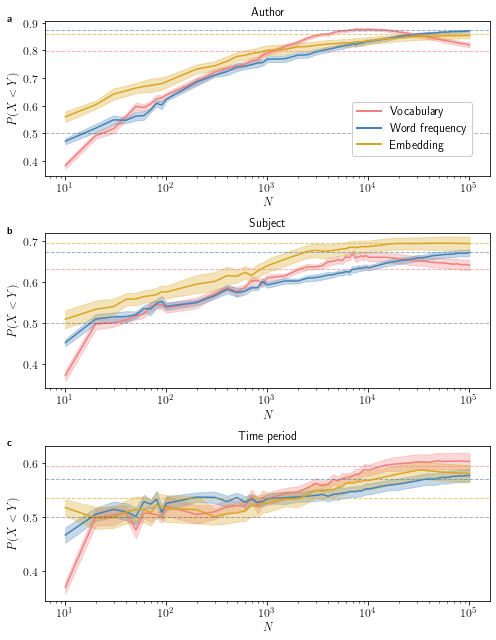

In [8]:
fig, axes = plt.subplots(3,1,figsize=(7,9), tight_layout=True)

legend_names = {'jaccard':'Vocabulary','jsdopt':'Word frequency','embedding':'Embedding'}
task_names = {'author':'Author', 'subject':'Subject', 'time':'Time period'}

vocab_colour = 'lightcoral'
freq_colour = 'steelblue'
emb_colour = 'goldenrod'

file_path = f'../output_files/jaccard_results_new.pickle'
with open(file_path, 'rb') as f:
    jaccard_results = pickle.load(f)
jsdopt_map = {'author':0.8742726, 'subject':0.6749185, 'time':0.5712482}
embedding_func_map = {'author':'angular','subject':'angular','time':'manhattan'}

colour_map = {'jaccard':vocab_colour, 'jsdopt':freq_colour, 'embedding':emb_colour}

i = 0
for task in ['author', 'subject', 'time']:
    ax = axes[i]
    ax.set_xlabel(r'$N$')
    ax.set_ylabel(r'$P(X<Y)$')
    for measure_name in ['jaccard', 'jsdopt']: #['jaccard', 'overlap', 'jsd1', 'jsdopt']:
        final_N_vals = []
        final_mean_vals = []
        final_err_vals = []
        for size in ['very_small', 'small', 'large']:
            file_path = f'../output_files/{measure_name}_final_resample_results_{size}.pickle'
            with open(file_path, 'rb') as f:
                measure_N = pickle.load(f)
            results = measure_N[task]
            N_vals = []
            mean_vals = []
            error_vals = []
            for h in results:
                N_vals.append(h)
                val_list = results[h]
                mean_vals.append(np.mean(val_list))
                error_vals.append(np.std(val_list))
            
            if size == 'very_small':
                final_N_vals += N_vals
                final_mean_vals += mean_vals
                final_err_vals += error_vals
            else:
                final_N_vals += N_vals[2:]
                final_mean_vals += mean_vals[2:]
                final_err_vals += error_vals[2:]
        
        ax.plot(final_N_vals, final_mean_vals, label = legend_names[measure_name], color = colour_map[measure_name],
                alpha = 1)
        ax.fill_between(final_N_vals, np.array(final_mean_vals) - np.array(final_err_vals)/np.sqrt(10), 
                        np.array(final_mean_vals) + np.array(final_err_vals)/np.sqrt(10), 
                        alpha=0.3, color = colour_map[measure_name])
        
        if measure_name == 'jaccard':
            ax.axhline(np.mean(jaccard_results['new'][task]), ls='--', lw=1, color = colour_map[measure_name], alpha=0.6)
        elif measure_name == 'jsdopt':
            ax.axhline(jsdopt_map[task], ls='--', lw=1, color = colour_map[measure_name], alpha=0.6)

    measure_name = 'embedding'
    final_N_vals = []
    final_mean_vals = []
    final_err_vals = []

    for size in ['very_small', 'small', 'large']:
        file_path = f'../output_files/embedding_final_resample_results_{size}.pickle'
        with open(file_path, 'rb') as f:
            measure_N = pickle.load(f)
        results = measure_N[task]
        N_vals = []
        mean_vals = []
        error_vals = []
        for h in results:
            N_vals.append(h)
            val_list = results[h]
            mean_vals.append(np.mean(val_list))
            error_vals.append(np.std(val_list))

        if size == 'small':
            final_N_vals += N_vals[2:]
            final_mean_vals += mean_vals[2:]
            final_err_vals += error_vals[2:]
        else:
            final_N_vals += N_vals
            final_mean_vals += mean_vals
            final_err_vals += error_vals    

    ax.plot(final_N_vals, final_mean_vals, label = 'Embedding', color = colour_map[measure_name],
            alpha=1)
    ax.fill_between(final_N_vals, np.array(final_mean_vals) - np.array(final_err_vals)/np.sqrt(10), 
                    np.array(final_mean_vals) + np.array(final_err_vals)/np.sqrt(10), 
                    alpha=0.3, color = colour_map[measure_name])

    file_path = f'../output_files/{embedding_func_map[task]}_embedding_results_new.pickle'
    with open(file_path, 'rb') as f:
        emb_results = pickle.load(f)
    
    ax.axhline(np.mean(emb_results['new'][task]), ls='--', lw=1, color = colour_map[measure_name], alpha=0.6)

    ax.axhline(0.5, ls='--', lw=1, color='k', alpha=0.3)
    ax.set_xscale('log')

    if i == 0:
        legend_elements = [Line2D([0], [0], color=vocab_colour, lw=2,
                            label='Vocabulary'),
                        Line2D([0], [0], color=freq_colour, lw=2,
                                    label='Word frequency'),
                        Line2D([0], [0], color=emb_colour, lw=2,
                            label='Embedding')]

        ax.legend(handles=legend_elements, loc=(0.69,0.13),framealpha=1).get_frame().set_facecolor('w')

    if i == 0:
        ax.annotate(r'\textbf{a}',xy=(-0.085,1),xycoords = 'axes fraction',)
    elif i == 1:
        ax.annotate(r'\textbf{b}',xy=(-0.085,1),xycoords = 'axes fraction',)
        ax.set_ylim(top=0.72)
    elif i == 2:
        ax.annotate(r'\textbf{c}',xy=(-0.085,1),xycoords = 'axes fraction',)
        ax.yaxis.set_ticks([0.4,0.5,0.6])

    ax.set_title(task_names[task])
    i += 1

fig.show()

# fig.savefig("../figures/resampling_final_improved.pdf")